## Análise dados Copa do Mundo
Dados obtidos do site do wikipedia, análise pelo público pagante nas finais de cada edição

Link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [7]:
# Importa bibliotecas
import pandas as pd
import requests

# Aloca a url na variável URL
url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'

# Faz requisição à url e aloca na variável resposta
resposta = requests.get(url)

In [8]:
# Aloca a resposta do html da página na variavel table, para tratarmos posteriormente
table = pd.read_html(resposta.text)

In [9]:
# Seleciona a 12ª Tabela da resposta, que é a tabela que queremos trabalhar
df = table[11]

# Visualiza as 5 primeiras linhas do dataframe
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [4]:
# Se precisar trocar os nomes das colunas, podemos usar o iloc,
# Neste exemplo abaixo, toda primeira linha seria colocada como os nomes das colunas
# df.columns = df.iloc[0]

In [5]:
# Naturalmente, precisaríamos retirar a linha que do dataframe que agora seria os nomes das colunas
# df.drop(df.index[0], inplace=True)

# Verifique que a primeira linha, ano 1930 foi apagada
# df.head()

# ** Deixaremos o exemplo abaixo, mas rodamos os comandos anteriormente para resetar o dataframe

,Edição,Ano,Estádio,Local,Público pagante
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500
5,VI,1958,Estádio Råsunda,Solna,49.737


In [10]:
# Ver as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [11]:
# Se precisássemos converter a coluna publico pagante para inteiro...
# Daria erro se fosse object string por conta do '.' nos valores, ex: 68.346
# Então precisaríamos fazer um replace do ponto
# df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)
df['Público pagante'] = df['Público pagante'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Edição           21 non-null     object
 1   Ano              21 non-null     int64 
 2   Estádio          21 non-null     object
 3   Local            21 non-null     object
 4   Público pagante  21 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 968.0+ bytes


In [13]:
# Vamos construir um gráfico com a evolução do publico pagante
# Para isso, vamos importar novas bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

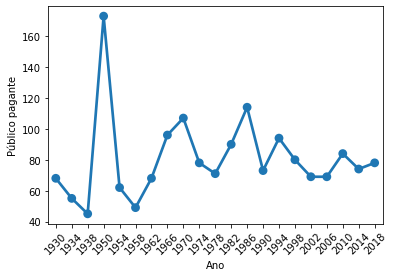

In [18]:
# Exibindo o gráfico de linha com marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df)
# Ajustando a visualização da legenda do eixo x
plt.xticks(rotation=45)
plt.show()